In [1]:
!pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 6.0 MB/s eta 0:00:00


# **Data**

• Details of keywords or search terms used (3 marks)

• Justification of approach taken (3 marks)

• Documentation of data collection procedure (3 marks)

• Annotation of data collection code developed using relevant APIs (4 marks)

• Relevant preprocessing steps applied (5 mark)
• Evidence of final dataset (2 marks)







In [2]:
import praw
import pandas as pd
from datetime import datetime
#first the python data scraping library (praw),
#import pandas to manipulate the data
#importing datetime, to specify the time line when the comments are made

SUBMISSION_URL = "https://www.reddit.com/r/gadgets/comments/jksu9z/nissan_actively_discourages_battery_replacement/"
SECRET = "1nZaMlZNDhfW5oACpNKvZmcAAtx7lQ"
APP_ID = "EvzAPLuSZK_MmAAThn8sgA"

reddit = praw.Reddit(
    client_id=APP_ID,
    client_secret=SECRET,
    user_agent="Comment Extraction"
)

url = SUBMISSION_URL
submission = reddit.submission(url=url)
post_title = submission.title

rows = []
for n, comment in enumerate(submission.comments.list()):
    if isinstance(comment, praw.models.MoreComments):
        continue  #to  Skip 'MoreComments' objects
    if not comment.author:  # used this code to clarify that not all comments have an author
        continue

    row = {
        "post_title": post_title,
        "author": comment.author.name,
        "body": comment.body,
        "timestamp": datetime.utcfromtimestamp(comment.created_utc).strftime('%Y-%m-%d %H:%M:%S'),  # this Convert Unix timestamp to human-readable format
        "n_words": len(comment.body.split())
    }
    rows.append(row)

def count_characters(row):
    return len(row.body)

df = pd.DataFrame(rows)

#this adds a column containing the character count
df["chars"] = df.apply(count_characters, axis=1)
print(df)

#To get the quantitative description of the data
print(df["chars"].min(), df["chars"].max(), df["chars"].mean())
#then the extracted data is loaded in to a csv file
df.to_csv("Nissan_comments1.csv")


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                                            post_title               author  \
0    Nissan Actively Discourages Battery Replacemen...              stortag   
1    Nissan Actively Discourages Battery Replacemen...             Car-face   
2    Nissan Actively Discourages Battery Replacemen...  Idiot_Savant_Tinker   
3    Nissan Actively Discourages Battery Replacemen...             wewewawa   
4    Nissan Actively Discourages Battery Replacemen...       generaljimdave   
..                                                 ...                  ...   
395  Nissan Actively Discourages Battery Replacemen...             BMack037   
396  Nissan Actively Discourages Battery Replacemen...    nottodayspiderman   
397  Nissan Actively Discourages Battery Replacemen...   Majestic_Dildocorn   
398  Nissan Actively Discourages Battery Replacemen...           angrydeuce   
399  Nissan Actively Discourages Battery Replacemen...               calr0x   

                                                  b

In [3]:
import praw
import pandas as pd
from datetime import datetime

SUBMISSION_URL = "https://www.reddit.com/r/electricvehicles/comments/14krikn/2024_nissan_leaf_pricing_starts_at_28140/"
SECRET = "1nZaMlZNDhfW5oACpNKvZmcAAtx7lQ"
APP_ID = "EvzAPLuSZK_MmAAThn8sgA"

reddit = praw.Reddit(
    client_id=APP_ID,
    client_secret=SECRET,
    user_agent="Comment Extraction"
)

url = SUBMISSION_URL
submission = reddit.submission(url=url)
post_title = submission.title

rows = []
for n, comment in enumerate(submission.comments.list()):
    if isinstance(comment, praw.models.MoreComments):
        continue  # Skip 'MoreComments' objects
    if not comment.author:  # not all comments have an author
        continue

    row = {
        "post_title": post_title,
        "author": comment.author.name,
        "body": comment.body,
        "timestamp": datetime.utcfromtimestamp(comment.created_utc).strftime('%Y-%m-%d %H:%M:%S'),  # Convert Unix timestamp to human-readable format
        "n_words": len(comment.body.split())
    }
    rows.append(row)

def count_characters(row):
    return len(row.body)

df = pd.DataFrame(rows)

# add a column containing the character count
df["chars"] = df.apply(count_characters, axis=1)
print(df)

# summary statistics
print(df["chars"].min(), df["chars"].max(), df["chars"].mean())
df.to_csv("Nissan_comments2.csv")


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                                     post_title              author  \
0    2024 Nissan LEAF pricing starts at $28,140         3mptyspaces   
1    2024 Nissan LEAF pricing starts at $28,140     FledglingNonCon   
2    2024 Nissan LEAF pricing starts at $28,140     Der_Kommissar73   
3    2024 Nissan LEAF pricing starts at $28,140           kaisenls1   
4    2024 Nissan LEAF pricing starts at $28,140    i_speak_the_truf   
..                                          ...                 ...   
254  2024 Nissan LEAF pricing starts at $28,140  WaitformeBumblebee   
255  2024 Nissan LEAF pricing starts at $28,140    Captain_Generous   
256  2024 Nissan LEAF pricing starts at $28,140           Vanilla35   
257  2024 Nissan LEAF pricing starts at $28,140             iceynyo   
258  2024 Nissan LEAF pricing starts at $28,140              dcdttu   

                                                  body            timestamp  \
0    Leaf owner here. Don’t buy a Leaf now. I absol...  2023-06-27 2

In [4]:
import praw
import pandas as pd
from datetime import datetime

SUBMISSION_URL = "https://www.reddit.com/r/cars/comments/swm4i4/why_is_car_and_driver_shitting_on_the_nissan_leaf/"
SECRET = "1nZaMlZNDhfW5oACpNKvZmcAAtx7lQ"
APP_ID = "EvzAPLuSZK_MmAAThn8sgA"

reddit = praw.Reddit(
    client_id=APP_ID,
    client_secret=SECRET,
    user_agent="Comment Extraction"
)

url = SUBMISSION_URL
submission = reddit.submission(url=url)
post_title = submission.title

rows = []
for n, comment in enumerate(submission.comments.list()):
    if isinstance(comment, praw.models.MoreComments):
        continue  # Skip 'MoreComments' objects
    if not comment.author:  # not all comments have an author
        continue

    row = {
        "post_title": post_title,
        "author": comment.author.name,
        "body": comment.body,
        "timestamp": datetime.utcfromtimestamp(comment.created_utc).strftime('%Y-%m-%d %H:%M:%S'),  # Convert Unix timestamp to human-readable format
        "n_words": len(comment.body.split())
    }
    rows.append(row)

def count_characters(row):
    return len(row.body)

df = pd.DataFrame(rows)

# add a column containing the character count
df["chars"] = df.apply(count_characters, axis=1)
print(df)

# summary statistics
print(df["chars"].min(), df["chars"].max(), df["chars"].mean())
df.to_csv("Nissan_comments3.csv")


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                                            post_title                author  \
0    Why is Car and Driver shitting on the Nissan L...            vantafanta   
1    Why is Car and Driver shitting on the Nissan L...           LuckyAce398   
2    Why is Car and Driver shitting on the Nissan L...          Eurobeat9182   
3    Why is Car and Driver shitting on the Nissan L...               dissss0   
4    Why is Car and Driver shitting on the Nissan L...                Ts61vw   
..                                                 ...                   ...   
394  Why is Car and Driver shitting on the Nissan L...           degggendorf   
395  Why is Car and Driver shitting on the Nissan L...  senior_neet_engineer   
396  Why is Car and Driver shitting on the Nissan L...            DrRazmataz   
397  Why is Car and Driver shitting on the Nissan L...              RacerM53   
398  Why is Car and Driver shitting on the Nissan L...             Hablapata   

                                       

In [5]:
import praw
import pandas as pd
from datetime import datetime

SUBMISSION_URL = "https://www.reddit.com/r/cars/comments/17ubiji/savagegeese_2024_nissan_leaf/"
SECRET = "1nZaMlZNDhfW5oACpNKvZmcAAtx7lQ"
APP_ID = "EvzAPLuSZK_MmAAThn8sgA"

reddit = praw.Reddit(
    client_id=APP_ID,
    client_secret=SECRET,
    user_agent="Comment Extraction"
)

url = SUBMISSION_URL
submission = reddit.submission(url=url)
post_title = submission.title

rows = []
for n, comment in enumerate(submission.comments.list()):
    if isinstance(comment, praw.models.MoreComments):
        continue  # Skip 'MoreComments' objects
    if not comment.author:  # not all comments have an author
        continue

    row = {
        "post_title": post_title,
        "author": comment.author.name,
        "body": comment.body,
        "timestamp": datetime.utcfromtimestamp(comment.created_utc).strftime('%Y-%m-%d %H:%M:%S'),  # Convert Unix timestamp to human-readable format
        "n_words": len(comment.body.split())
    }
    rows.append(row)

def count_characters(row):
    return len(row.body)

df = pd.DataFrame(rows)

# add a column containing the character count
df["chars"] = df.apply(count_characters, axis=1)
print(df)

# summary statistics
print(df["chars"].min(), df["chars"].max(), df["chars"].mean())
df.to_csv("Nissan_comments4.csv")




It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                        post_title              author  \
0   Savagegeese | 2024 Nissan Leaf          mr_lab_rat   
1   Savagegeese | 2024 Nissan Leaf      CmanderShep117   
2   Savagegeese | 2024 Nissan Leaf         RiftHunter4   
3   Savagegeese | 2024 Nissan Leaf           Chase1987   
4   Savagegeese | 2024 Nissan Leaf         hugh_madson   
..                             ...                 ...   
94  Savagegeese | 2024 Nissan Leaf          czarfalcon   
95  Savagegeese | 2024 Nissan Leaf  PlanetaryWorldwide   
96  Savagegeese | 2024 Nissan Leaf              aprtur   
97  Savagegeese | 2024 Nissan Leaf      spongebob_meth   
98  Savagegeese | 2024 Nissan Leaf      spongebob_meth   

                                                 body            timestamp  \
0   People want cheap EV. No shit, who would have ...  2023-11-13 15:50:24   
1   Congrats Nissan for making it look like a norm...  2023-11-13 16:52:29   
2   Hot rodding Nissan Leafs (Leaves?) is gonna be...  2023-11-13 16:

In [6]:
import praw
import pandas as pd
from datetime import datetime

SUBMISSION_URL = "https://www.reddit.com/r/electricvehicles/comments/19677mk/might_be_regretting_new_nissan_leaf/"
SECRET = "1nZaMlZNDhfW5oACpNKvZmcAAtx7lQ"
APP_ID = "EvzAPLuSZK_MmAAThn8sgA"

reddit = praw.Reddit(
    client_id=APP_ID,
    client_secret=SECRET,
    user_agent="Comment Extraction"
)

url = SUBMISSION_URL
submission = reddit.submission(url=url)
post_title = submission.title

rows = []
for n, comment in enumerate(submission.comments.list()):
    if isinstance(comment, praw.models.MoreComments):
        continue  # Skip 'MoreComments' objects
    if not comment.author:  # not all comments have an author
        continue

    row = {
        "post_title": post_title,
        "author": comment.author.name,
        "body": comment.body,
        "timestamp": datetime.utcfromtimestamp(comment.created_utc).strftime('%Y-%m-%d %H:%M:%S'),  # Convert Unix timestamp to human-readable format
        "n_words": len(comment.body.split())
    }
    rows.append(row)

def count_characters(row):
    return len(row.body)

df = pd.DataFrame(rows)

# add a column containing the character count
df["chars"] = df.apply(count_characters, axis=1)
print(df)

# summary statistics
print(df["chars"].min(), df["chars"].max(), df["chars"].mean())
df.to_csv("Nissan_comments5.csv")




It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                              post_title              author  \
0    Might be regretting new Nissan leaf             bobjr94   
1    Might be regretting new Nissan leaf       SirTwitchALot   
2    Might be regretting new Nissan leaf         gabetravels   
3    Might be regretting new Nissan leaf  BedditTedditReddit   
4    Might be regretting new Nissan leaf       MrPuddington2   
..                                   ...                 ...   
174  Might be regretting new Nissan leaf     Cinema_Colorist   
175  Might be regretting new Nissan leaf          Jonger1150   
176  Might be regretting new Nissan leaf       NilsTillander   
177  Might be regretting new Nissan leaf     Cinema_Colorist   
178  Might be regretting new Nissan leaf     Cinema_Colorist   

                                                  body            timestamp  \
0    You sure about that ? You said you are in Nova...  2024-01-14 04:36:08   
1    The Leaf is one of the slower charging vehicle...  2024-01-14 05:29:

In [7]:
import praw
import pandas as pd
from datetime import datetime

SUBMISSION_URL = "https://www.reddit.com/r/electricvehicles/comments/y01u9v/got_our_first_ev_today_any_advice_for_newcomers/"
SECRET = "1nZaMlZNDhfW5oACpNKvZmcAAtx7lQ"
APP_ID = "EvzAPLuSZK_MmAAThn8sgA"

reddit = praw.Reddit(
    client_id=APP_ID,
    client_secret=SECRET,
    user_agent="Comment Extraction"
)

url = SUBMISSION_URL
submission = reddit.submission(url=url)
post_title = submission.title

rows = []
for n, comment in enumerate(submission.comments.list()):
    if isinstance(comment, praw.models.MoreComments):
        continue  # Skip 'MoreComments' objects
    if not comment.author:  # not all comments have an author
        continue

    row = {
        "post_title": post_title,
        "author": comment.author.name,
        "body": comment.body,
        "timestamp": datetime.utcfromtimestamp(comment.created_utc).strftime('%Y-%m-%d %H:%M:%S'),  # Convert Unix timestamp to human-readable format
        "n_words": len(comment.body.split())
    }
    rows.append(row)

def count_characters(row):
    return len(row.body)

df = pd.DataFrame(rows)

# add a column containing the character count
df["chars"] = df.apply(count_characters, axis=1)
print(df)

# summary statistics
print(df["chars"].min(), df["chars"].max(), df["chars"].mean())
df.to_csv("Nissan_comments6.csv")


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                                            post_title              author  \
0    Got our first EV today- any advice for newcome...        TehSakaarson   
1    Got our first EV today- any advice for newcome...          droids4evr   
2    Got our first EV today- any advice for newcome...   StrawberryBlondeB   
3    Got our first EV today- any advice for newcome...  Other_Opposite8903   
4    Got our first EV today- any advice for newcome...               ascii   
..                                                 ...                 ...   
144  Got our first EV today- any advice for newcome...           byrdman77   
145  Got our first EV today- any advice for newcome...       coredumperror   
146  Got our first EV today- any advice for newcome...           peshwengi   
147  Got our first EV today- any advice for newcome...            MrMoogie   
148  Got our first EV today- any advice for newcome...       coredumperror   

                                                  body         

In [8]:
import praw
import pandas as pd
from datetime import datetime

SUBMISSION_URL = "https://www.reddit.com/r/Costco/comments/xd32sd/measure_first_people_success_in_a_nissan_leaf/"
SECRET = "1nZaMlZNDhfW5oACpNKvZmcAAtx7lQ"
APP_ID = "EvzAPLuSZK_MmAAThn8sgA"

reddit = praw.Reddit(
    client_id=APP_ID,
    client_secret=SECRET,
    user_agent="Comment Extraction"
)

url = SUBMISSION_URL
submission = reddit.submission(url=url)
post_title = submission.title

rows = []
for n, comment in enumerate(submission.comments.list()):
    if isinstance(comment, praw.models.MoreComments):
        continue  # Skip 'MoreComments' objects
    if not comment.author:  # not all comments have an author
        continue

    row = {
        "post_title": post_title,
        "author": comment.author.name,
        "body": comment.body,
        "timestamp": datetime.utcfromtimestamp(comment.created_utc).strftime('%Y-%m-%d %H:%M:%S'),  # Convert Unix timestamp to human-readable format
        "n_words": len(comment.body.split())
    }
    rows.append(row)

def count_characters(row):
    return len(row.body)

df = pd.DataFrame(rows)

# add a column containing the character count
df["chars"] = df.apply(count_characters, axis=1)
print(df)

# summary statistics
print(df["chars"].min(), df["chars"].max(), df["chars"].mean())
df.to_csv("Nissan_comments7.csv")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



                                         post_title          author  \
0    Measure first people. Success in a Nissan Leaf     yesididthat   
1    Measure first people. Success in a Nissan Leaf       KaiSimple   
2    Measure first people. Success in a Nissan Leaf  anonydragon098   
3    Measure first people. Success in a Nissan Leaf       PortGlass   
4    Measure first people. Success in a Nissan Leaf   mengosmoothie   
..                                              ...             ...   
142  Measure first people. Success in a Nissan Leaf    SquanchySnoo   
143  Measure first people. Success in a Nissan Leaf       towell420   
144  Measure first people. Success in a Nissan Leaf          denlan   
145  Measure first people. Success in a Nissan Leaf   Crazyblazy395   
146  Measure first people. Success in a Nissan Leaf    SquanchySnoo   

                                                  body            timestamp  \
0    Dude legit bought a tv just to shitpost \n\n*I...  2022-09-13 1

In [9]:
# importing pandas
import pandas as pd

# merging seven csv files
df = pd.concat(
	map(pd.read_csv, ['Nissan_comments1.csv', 'Nissan_comments2.csv','Nissan_comments3.csv','Nissan_comments4.csv','Nissan_comments5.csv','Nissan_comments6.csv','Nissan_comments7.csv']), ignore_index=True)
print(df)
df.to_csv("NissanLeaf_comments_merged.csv")




      Unnamed: 0                                         post_title  \
0              0  Nissan Actively Discourages Battery Replacemen...   
1              1  Nissan Actively Discourages Battery Replacemen...   
2              2  Nissan Actively Discourages Battery Replacemen...   
3              3  Nissan Actively Discourages Battery Replacemen...   
4              4  Nissan Actively Discourages Battery Replacemen...   
...          ...                                                ...   
1627         142     Measure first people. Success in a Nissan Leaf   
1628         143     Measure first people. Success in a Nissan Leaf   
1629         144     Measure first people. Success in a Nissan Leaf   
1630         145     Measure first people. Success in a Nissan Leaf   
1631         146     Measure first people. Success in a Nissan Leaf   

                   author                                               body  \
0                 stortag  I know a guy who made a business out of 

In [10]:
df.to_csv("NissanLeaf_comments_merged.csv")

Data cleaning

In [11]:
import re
def clean_text(text):
    '''On pipeline this part the texts are converted to lowercase,The links in the subreddits are removed, remove words containing numbers. text in brackets and punctuations, the words containing numbers are removed.
    '''
    text = str(text)
    text = re.sub(r'\s\s+', ' ', text)
    text= text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('@[^\s]+','',text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", text).split())
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [12]:
# placing the  the combined dataset into a pandas dataframe for further preprocessin , to prepare it to exploratory analysis


# Read the CSV file into a DataFrame
Nissan_Comments = pd.read_csv("NissanLeaf_comments_merged.csv")

Nissan_Comments

,Unnamed: 0.1,Unnamed: 0,post_title,author,body,timestamp,n_words,chars
0,0,0,Nissan Actively Discourages Battery Replacemen...,stortag,I know a guy who made a business out of this v...,2020-10-30 11:17:54,46,268
1,1,1,Nissan Actively Discourages Battery Replacemen...,Car-face,Nissan Leaf sales in Canada peaked in 2018 at ...,2020-10-30 10:39:58,69,435
2,2,2,Nissan Actively Discourages Battery Replacemen...,Idiot_Savant_Tinker,I looked at a leaf at a local nissan dealer. $...,2020-10-30 11:20:54,30,144
3,3,3,Nissan Actively Discourages Battery Replacemen...,wewewawa,"“I love the car,” he explains. “Honestly, in t...",2020-10-30 08:16:16,42,243
4,4,4,Nissan Actively Discourages Battery Replacemen...,generaljimdave,A competent high voltage technician could refu...,2020-10-30 11:59:43,125,676
...,...,...,...,...,...,...,...,...
1627,1627,142,Measure first people. Success in a Nissan Leaf,SquanchySnoo,🍻,2022-09-13 22:00:18,1,1
1628,1628,143,Measure first people. Success in a Nissan Leaf,towell420,I couldn’t say. I just know if the box stays t...,2022-09-14 00:31:55,18,88
1629,1629,144,Measure first people. Success in a Nissan Leaf,denlan,The diagram on the side of the box has an arro...,2022-09-13 18:06:07,20,98
1630,1630,145,Measure first people. Success in a Nissan Leaf,Crazyblazy395,Fair. I didn't see that,2022-09-13 21:24:24,5,23


In [13]:
Nissan_Comments

,Unnamed: 0.1,Unnamed: 0,post_title,author,body,timestamp,n_words,chars
0,0,0,Nissan Actively Discourages Battery Replacemen...,stortag,I know a guy who made a business out of this v...,2020-10-30 11:17:54,46,268
1,1,1,Nissan Actively Discourages Battery Replacemen...,Car-face,Nissan Leaf sales in Canada peaked in 2018 at ...,2020-10-30 10:39:58,69,435
2,2,2,Nissan Actively Discourages Battery Replacemen...,Idiot_Savant_Tinker,I looked at a leaf at a local nissan dealer. $...,2020-10-30 11:20:54,30,144
3,3,3,Nissan Actively Discourages Battery Replacemen...,wewewawa,"“I love the car,” he explains. “Honestly, in t...",2020-10-30 08:16:16,42,243
4,4,4,Nissan Actively Discourages Battery Replacemen...,generaljimdave,A competent high voltage technician could refu...,2020-10-30 11:59:43,125,676
...,...,...,...,...,...,...,...,...
1627,1627,142,Measure first people. Success in a Nissan Leaf,SquanchySnoo,🍻,2022-09-13 22:00:18,1,1
1628,1628,143,Measure first people. Success in a Nissan Leaf,towell420,I couldn’t say. I just know if the box stays t...,2022-09-14 00:31:55,18,88
1629,1629,144,Measure first people. Success in a Nissan Leaf,denlan,The diagram on the side of the box has an arro...,2022-09-13 18:06:07,20,98
1630,1630,145,Measure first people. Success in a Nissan Leaf,Crazyblazy395,Fair. I didn't see that,2022-09-13 21:24:24,5,23


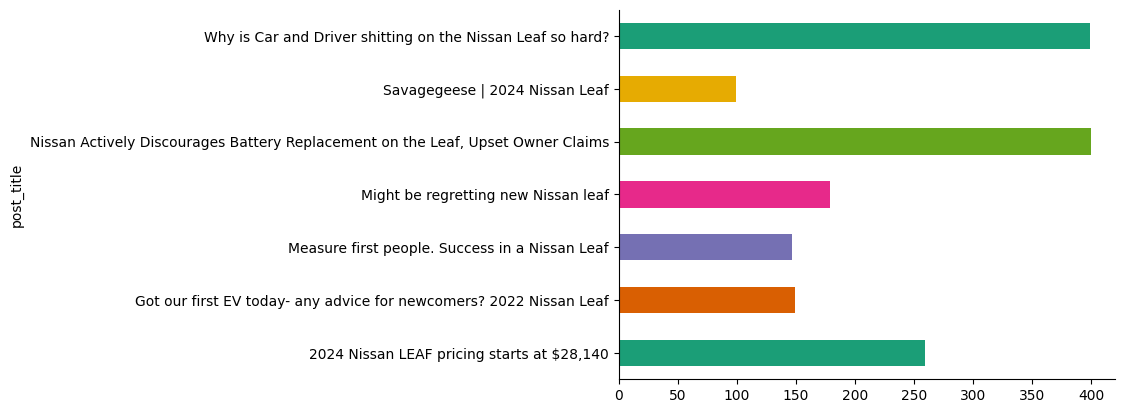

In [14]:
# @title post_title

from matplotlib import pyplot as plt
import seaborn as sns
Nissan_Comments.groupby('post_title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Data : Preprocessing
Cleaned data links numbers are removed

In [15]:
Nissan_Comments['body'] = Nissan_Comments['body'].apply(lambda x:clean_text(x))
Nissan_Comments

,Unnamed: 0.1,Unnamed: 0,post_title,author,body,timestamp,n_words,chars
0,0,0,Nissan Actively Discourages Battery Replacemen...,stortag,i know a guy who made a business out of this v...,2020-10-30 11:17:54,46,268
1,1,1,Nissan Actively Discourages Battery Replacemen...,Car-face,nissan leaf sales in canada peaked in at sal...,2020-10-30 10:39:58,69,435
2,2,2,Nissan Actively Discourages Battery Replacemen...,Idiot_Savant_Tinker,i looked at a leaf at a local nissan dealer ...,2020-10-30 11:20:54,30,144
3,3,3,Nissan Actively Discourages Battery Replacemen...,wewewawa,i love the car he explains honestly in three y...,2020-10-30 08:16:16,42,243
4,4,4,Nissan Actively Discourages Battery Replacemen...,generaljimdave,a competent high voltage technician could refu...,2020-10-30 11:59:43,125,676
...,...,...,...,...,...,...,...,...
1627,1627,142,Measure first people. Success in a Nissan Leaf,SquanchySnoo,,2022-09-13 22:00:18,1,1
1628,1628,143,Measure first people. Success in a Nissan Leaf,towell420,i couldn t say i just know if the box stays to...,2022-09-14 00:31:55,18,88
1629,1629,144,Measure first people. Success in a Nissan Leaf,denlan,the diagram on the side of the box has an arro...,2022-09-13 18:06:07,20,98
1630,1630,145,Measure first people. Success in a Nissan Leaf,Crazyblazy395,fair i didn t see that,2022-09-13 21:24:24,5,23


In [16]:
Nissan_cleaned_df = Nissan_Comments.copy()  # Create a copy of the original DataFrame
Nissan_cleaned_df['body'] = Nissan_cleaned_df['body'].apply(lambda x: clean_text(x))  # Apply the clean_text function to the 'body' column

# Now, 'Nissan_cleaned_df' contains the cleaned data

Nissan_cleaned_df

,Unnamed: 0.1,Unnamed: 0,post_title,author,body,timestamp,n_words,chars
0,0,0,Nissan Actively Discourages Battery Replacemen...,stortag,i know a guy who made a business out of this v...,2020-10-30 11:17:54,46,268
1,1,1,Nissan Actively Discourages Battery Replacemen...,Car-face,nissan leaf sales in canada peaked in at sales...,2020-10-30 10:39:58,69,435
2,2,2,Nissan Actively Discourages Battery Replacemen...,Idiot_Savant_Tinker,i looked at a leaf at a local nissan dealer is...,2020-10-30 11:20:54,30,144
3,3,3,Nissan Actively Discourages Battery Replacemen...,wewewawa,i love the car he explains honestly in three y...,2020-10-30 08:16:16,42,243
4,4,4,Nissan Actively Discourages Battery Replacemen...,generaljimdave,a competent high voltage technician could refu...,2020-10-30 11:59:43,125,676
...,...,...,...,...,...,...,...,...
1627,1627,142,Measure first people. Success in a Nissan Leaf,SquanchySnoo,,2022-09-13 22:00:18,1,1
1628,1628,143,Measure first people. Success in a Nissan Leaf,towell420,i couldn t say i just know if the box stays to...,2022-09-14 00:31:55,18,88
1629,1629,144,Measure first people. Success in a Nissan Leaf,denlan,the diagram on the side of the box has an arro...,2022-09-13 18:06:07,20,98
1630,1630,145,Measure first people. Success in a Nissan Leaf,Crazyblazy395,fair i didn t see that,2022-09-13 21:24:24,5,23


In [17]:
Nissan_cleaned_df

,Unnamed: 0.1,Unnamed: 0,post_title,author,body,timestamp,n_words,chars
0,0,0,Nissan Actively Discourages Battery Replacemen...,stortag,i know a guy who made a business out of this v...,2020-10-30 11:17:54,46,268
1,1,1,Nissan Actively Discourages Battery Replacemen...,Car-face,nissan leaf sales in canada peaked in at sales...,2020-10-30 10:39:58,69,435
2,2,2,Nissan Actively Discourages Battery Replacemen...,Idiot_Savant_Tinker,i looked at a leaf at a local nissan dealer is...,2020-10-30 11:20:54,30,144
3,3,3,Nissan Actively Discourages Battery Replacemen...,wewewawa,i love the car he explains honestly in three y...,2020-10-30 08:16:16,42,243
4,4,4,Nissan Actively Discourages Battery Replacemen...,generaljimdave,a competent high voltage technician could refu...,2020-10-30 11:59:43,125,676
...,...,...,...,...,...,...,...,...
1627,1627,142,Measure first people. Success in a Nissan Leaf,SquanchySnoo,,2022-09-13 22:00:18,1,1
1628,1628,143,Measure first people. Success in a Nissan Leaf,towell420,i couldn t say i just know if the box stays to...,2022-09-14 00:31:55,18,88
1629,1629,144,Measure first people. Success in a Nissan Leaf,denlan,the diagram on the side of the box has an arro...,2022-09-13 18:06:07,20,98
1630,1630,145,Measure first people. Success in a Nissan Leaf,Crazyblazy395,fair i didn t see that,2022-09-13 21:24:24,5,23


# **Explaratory**


In [ ]:
!pip install langdetect
from langdetect import detect
# installed langdetect then created a column to specify the language
def language_code(row):
  try:
    return detect(row["body"])
  except:
    return "Unknown" #this returns unknown if launguage is not recognised

df["lang"] = df.apply(language_code, axis=1)

In [ ]:
df

NameError: name 'df' is not defined

In [ ]:
df["lang"].value_counts().head(10)

NameError: name 'df' is not defined

In [ ]:
# visualizing the frequency of language
df['lang'].value_counts().iloc[1:].plot(kind="bar",
                                         figsize=(8,6), color="y",
                                         title="Post by Language Frequency (Non-English)",
                                         xlabel="Language Code",
                                         ylabel="Frequency")

plt.show()  # Display the plot


NameError: name 'df' is not defined

In [ ]:
Nissan_cleaned_df

,Unnamed: 0.1,Unnamed: 0,post_title,author,body,timestamp,n_words,chars
0,0,0,Nissan Actively Discourages Battery Replacemen...,stortag,i know a guy who made a business out of this v...,2020-10-30 11:17:54,46,268
1,1,1,Nissan Actively Discourages Battery Replacemen...,Car-face,nissan leaf sales in canada peaked in at sales...,2020-10-30 10:39:58,69,435
2,2,2,Nissan Actively Discourages Battery Replacemen...,Idiot_Savant_Tinker,i looked at a leaf at a local nissan dealer is...,2020-10-30 11:20:54,30,144
3,3,3,Nissan Actively Discourages Battery Replacemen...,wewewawa,i love the car he explains honestly in three y...,2020-10-30 08:16:16,42,243
4,4,4,Nissan Actively Discourages Battery Replacemen...,generaljimdave,a competent high voltage technician could refu...,2020-10-30 11:59:43,125,676
...,...,...,...,...,...,...,...,...
1646,1646,143,Measure first people. Success in a Nissan Leaf,SquanchySnoo,,2022-09-13 22:00:18,1,1
1647,1647,144,Measure first people. Success in a Nissan Leaf,towell420,i couldn t say i just know if the box stays to...,2022-09-14 00:31:55,18,88
1648,1648,145,Measure first people. Success in a Nissan Leaf,denlan,the diagram on the side of the box has an arro...,2022-09-13 18:06:07,20,98
1649,1649,146,Measure first people. Success in a Nissan Leaf,Crazyblazy395,fair i didn t see that,2022-09-13 21:24:24,5,23


descriptive

In [ ]:
import pandas as pd  # Import pandas library if not already done
Nissan_Comments["body"].describe()

count     1651
unique    1635
top           
freq         8
Name: body, dtype: object

most commom char length

In [ ]:
Nissan_Comments["body"].mode()

0    
Name: body, dtype: object

To show the first few rows

In [ ]:
Nissan_cleaned_df.head()

,Unnamed: 0.1,Unnamed: 0,post_title,author,body,timestamp,n_words,chars
0,0,0,Nissan Actively Discourages Battery Replacemen...,stortag,i know a guy who made a business out of this v...,2020-10-30 11:17:54,46,268
1,1,1,Nissan Actively Discourages Battery Replacemen...,Car-face,nissan leaf sales in canada peaked in at sales...,2020-10-30 10:39:58,69,435
2,2,2,Nissan Actively Discourages Battery Replacemen...,Idiot_Savant_Tinker,i looked at a leaf at a local nissan dealer is...,2020-10-30 11:20:54,30,144
3,3,3,Nissan Actively Discourages Battery Replacemen...,wewewawa,i love the car he explains honestly in three y...,2020-10-30 08:16:16,42,243
4,4,4,Nissan Actively Discourages Battery Replacemen...,generaljimdave,a competent high voltage technician could refu...,2020-10-30 11:59:43,125,676


# **Explaratory**

for the whole merged dataset, to show  the polpular words

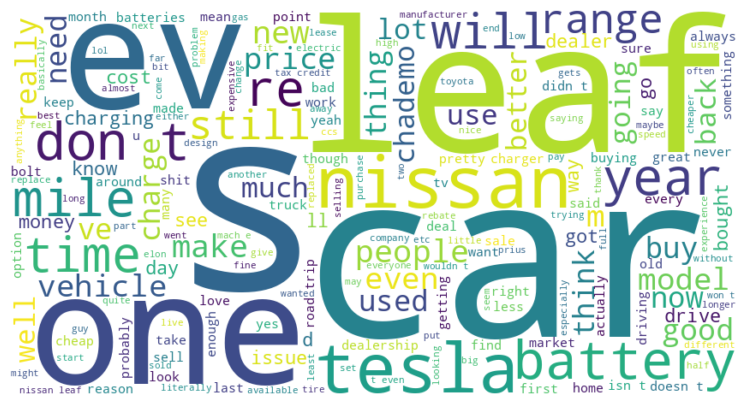

In [ ]:
# Analysis of popular words or phrases (1) -
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a column named 'body'

# Combine all text from the 'body' column into a single string
text = ' '.join(Nissan_cleaned_df['body'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=850, height=450, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



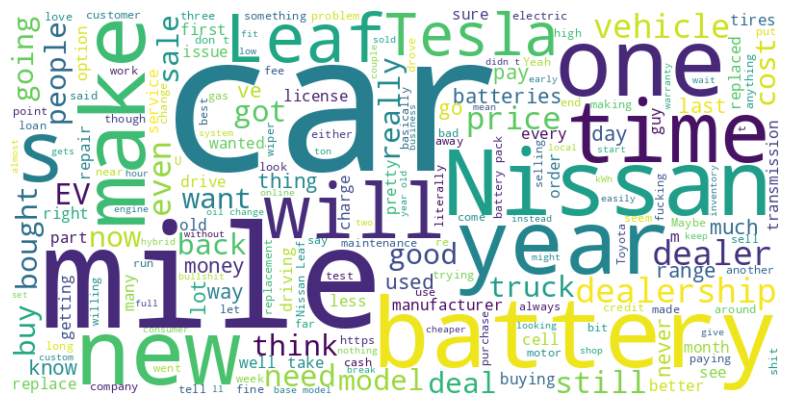

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV file into a DataFrame
data = pd.read_csv('Nissan_comments1.csv')

# Assuming the CSV file has a column named 'body' that contains the text data
# Combine all text from the 'body' column into a single string
text = ' '.join(data['body'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


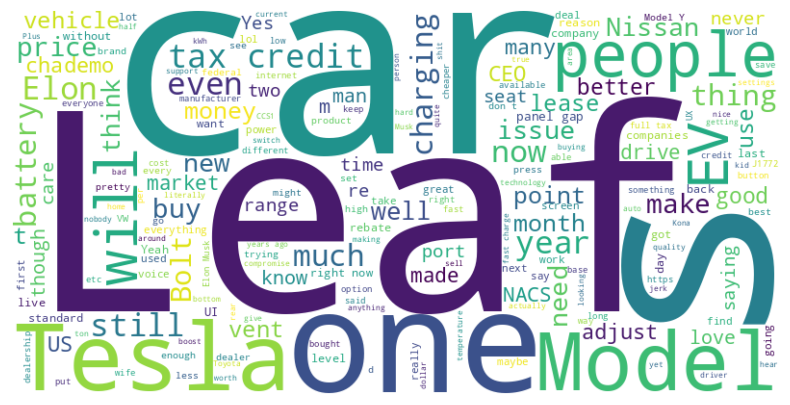

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV file into a DataFrame
data = pd.read_csv('Nissan_comments2.csv')

# Assuming the CSV file has a column named 'body' that contains the text data
# Combine all text from the 'body' column into a single string
text = ' '.join(data['body'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


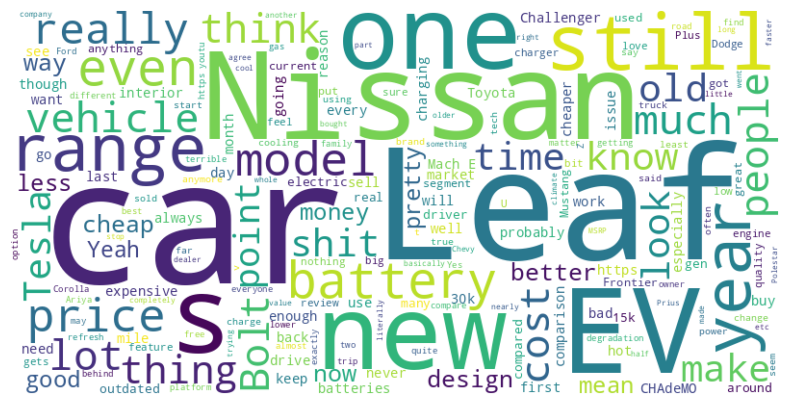

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV file into a DataFrame
data = pd.read_csv('Nissan_comments3.csv')

# Assuming the CSV file has a column named 'body' that contains the text data
# Combine all text from the 'body' column into a single string
text = ' '.join(data['body'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


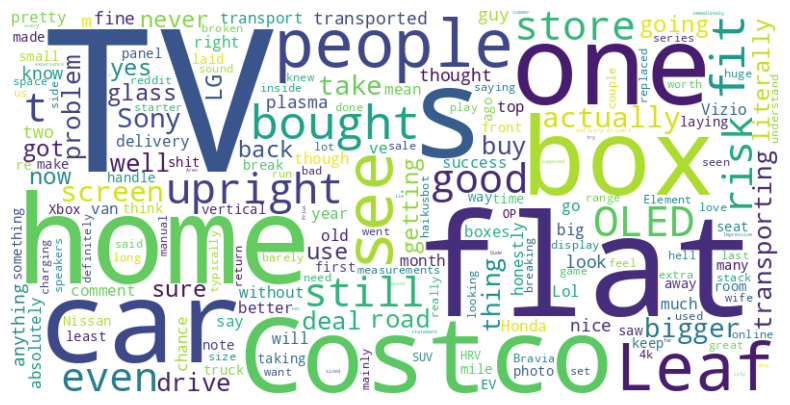

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV file into a DataFrame
data = pd.read_csv('Nissan_comments7.csv')

# Assuming the CSV file has a column named 'body' that contains the text data
# Combine all text from the 'body' column into a single string
text = ' '.join(data['body'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
Nissan_Comments

,Unnamed: 0.1,Unnamed: 0,post_title,author,body,timestamp,n_words,chars
0,0,0,Nissan Actively Discourages Battery Replacemen...,stortag,i know a guy who made a business out of this v...,2020-10-30 11:17:54,46,268
1,1,1,Nissan Actively Discourages Battery Replacemen...,Car-face,nissan leaf sales in canada peaked in at sal...,2020-10-30 10:39:58,69,435
2,2,2,Nissan Actively Discourages Battery Replacemen...,Idiot_Savant_Tinker,i looked at a leaf at a local nissan dealer ...,2020-10-30 11:20:54,30,144
3,3,3,Nissan Actively Discourages Battery Replacemen...,wewewawa,i love the car he explains honestly in three y...,2020-10-30 08:16:16,42,243
4,4,4,Nissan Actively Discourages Battery Replacemen...,generaljimdave,a competent high voltage technician could refu...,2020-10-30 11:59:43,125,676
...,...,...,...,...,...,...,...,...
1646,1646,143,Measure first people. Success in a Nissan Leaf,SquanchySnoo,,2022-09-13 22:00:18,1,1
1647,1647,144,Measure first people. Success in a Nissan Leaf,towell420,i couldn t say i just know if the box stays to...,2022-09-14 00:31:55,18,88
1648,1648,145,Measure first people. Success in a Nissan Leaf,denlan,the diagram on the side of the box has an arro...,2022-09-13 18:06:07,20,98
1649,1649,146,Measure first people. Success in a Nissan Leaf,Crazyblazy395,fair i didn t see that,2022-09-13 21:24:24,5,23


In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

def preprocess(row):
    text = row["body"]
    # Check if the text is not NaN
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        keep = []
        for word in text.split():
            if word not in stopwords.words("english"):
                keep.append(word)
        processed_text = ' '.join(keep)
        # Check if processed text is not empty
        if processed_text.strip():
            return processed_text
        else:
            return text  # Return original text if processed text is empty
    else:
        return text  # Return original text if it's NaN

# Apply preprocess function to "body" column
Nissan_Comments["body"] = Nissan_Comments.apply(preprocess, axis=1)

# Display DataFrame
print(Nissan_Comments)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


      Unnamed: 0.1  Unnamed: 0  \
0                0           0   
1                1           1   
2                2           2   
3                3           3   
4                4           4   
...            ...         ...   
1646          1646         143   
1647          1647         144   
1648          1648         145   
1649          1649         146   
1650          1650         147   

                                             post_title               author  \
0     Nissan Actively Discourages Battery Replacemen...              stortag   
1     Nissan Actively Discourages Battery Replacemen...             Car-face   
2     Nissan Actively Discourages Battery Replacemen...  Idiot_Savant_Tinker   
3     Nissan Actively Discourages Battery Replacemen...             wewewawa   
4     Nissan Actively Discourages Battery Replacemen...       generaljimdave   
...                                                 ...                  ...   
1646     Measure first people. 

dataset after the removal of stop words

In [ ]:
Nissan_Comments

,Unnamed: 0.1,Unnamed: 0,post_title,author,body,timestamp,n_words,chars
0,0,0,Nissan Actively Discourages Battery Replacemen...,stortag,know guy made business problem upgrades older ...,2020-10-30 11:17:54,46,268
1,1,1,Nissan Actively Discourages Battery Replacemen...,Car-face,nissan leaf sales canada peaked sales next clo...,2020-10-30 10:39:58,69,435
2,2,2,Nissan Actively Discourages Battery Replacemen...,Idiot_Savant_Tinker,looked leaf local nissan dealer wanted get tes...,2020-10-30 11:20:54,30,144
3,3,3,Nissan Actively Discourages Battery Replacemen...,wewewawa,love car explains honestly three years km repl...,2020-10-30 08:16:16,42,243
4,4,4,Nissan Actively Discourages Battery Replacemen...,generaljimdave,competent high voltage technician could refurb...,2020-10-30 11:59:43,125,676
...,...,...,...,...,...,...,...,...
1646,1646,143,Measure first people. Success in a Nissan Leaf,SquanchySnoo,,2022-09-13 22:00:18,1,1
1647,1647,144,Measure first people. Success in a Nissan Leaf,towell420,say know box stays keep upright gonna keep upr...,2022-09-14 00:31:55,18,88
1648,1648,145,Measure first people. Success in a Nissan Leaf,denlan,diagram side box arrow pointed upright though ...,2022-09-13 18:06:07,20,98
1649,1649,146,Measure first people. Success in a Nissan Leaf,Crazyblazy395,fair see,2022-09-13 21:24:24,5,23


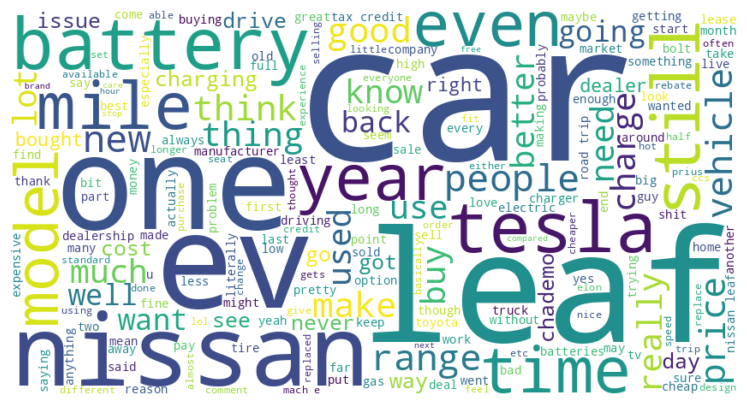

In [ ]:
# To Analyse popular words or phrases (1) -
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df is my DataFrame with a column named 'body'

#BY Combining all text from the 'body' column into a single string
text = ' '.join(Nissan_Comments['body'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=850, height=450, background_color='white').generate(text)

# To Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Term frequency

In [ ]:
from collections import Counter

word_counter = Counter()
for row in Nissan_Comments.to_dict("records"): #converts_to_dictionary
  word_counter.update(row["body"].split()) #tokenization
df_tf = pd.DataFrame(word_counter.most_common(12))
df_tf.columns = ["term", "frequency"]
df_tf

,term,frequency
0,car,450
1,leaf,389
2,like,274
3,get,217
4,nissan,214
5,battery,213
6,one,213
7,would,179
8,new,176
9,tesla,172


Noun phrase extraction big part of explanatory part

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


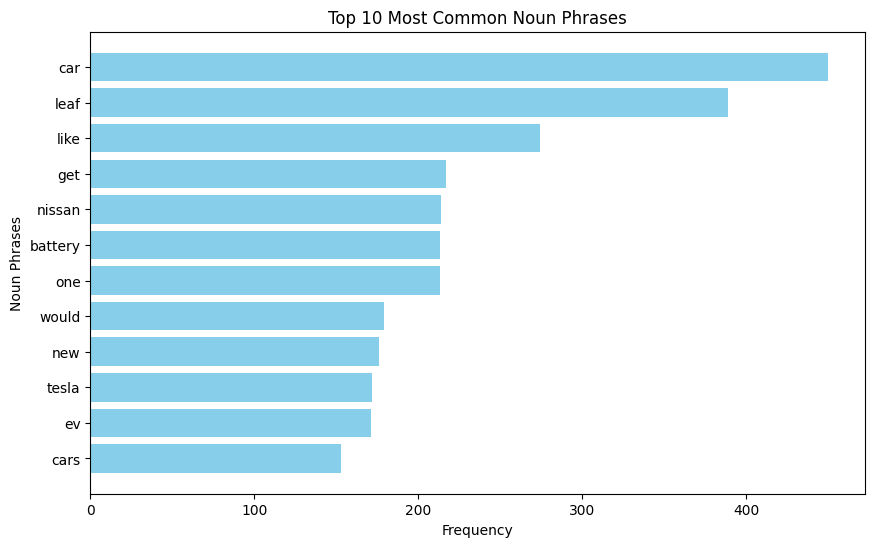

,term,frequency
0,new leaf,13
1,miles range,9
2,new car,8
3,road trip,8
4,tax credit,8
5,fast charge,8
6,road trips,8
7,nissan leaf,7
8,base model,7
9,new battery,6


from matplotlib import pyplot as plt
df_tf['frequency'].plot(kind='hist', bins=20, title='frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_tf['frequency'].plot(kind='line', figsize=(8, 4), title='frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import nltk
nltk.download("brown")
nltk.download('punkt')
from collections import Counter
from textblob import TextBlob
import pandas as pd
# Initialize a Counter object to count the frequency of each noun phrase
noun_phrase_counter = Counter()
# Define a function to extract noun phrases from text
def extract_noun_phrases(text):
    blob = TextBlob(text)
    return blob.noun_phrases
# Apply the function to the 'body' column and update the Counter object
for text in Nissan_Comments['body']:
    noun_phrases = extract_noun_phrases(text)
    noun_phrase_counter.update(noun_phrases)
# Create a DataFrame from the Counter object containing the most common noun phrases
df_tf = pd.DataFrame(noun_phrase_counter.most_common(12), columns=["term", "frequency"])

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(df_tf["term"], df_tf["frequency"], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Noun Phrases')
plt.title('Top 10 Most Common Noun Phrases')
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent phrases on top
plt.show()


# Display the DataFrame
df_tf


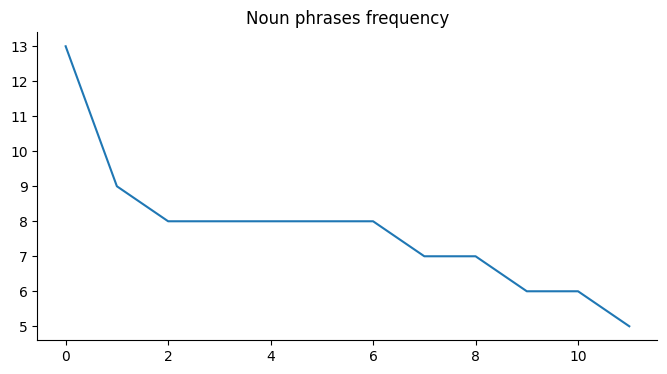

In [ ]:
from matplotlib import pyplot as plt
df_tf['frequency'].plot(kind='line', figsize=(8, 4), title='Noun phrases frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

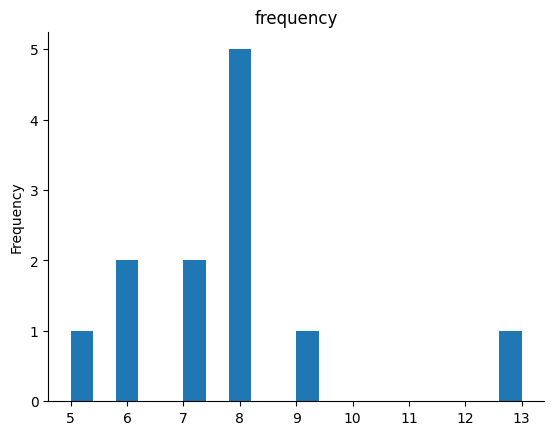

In [ ]:
# @title frequency

from matplotlib import pyplot as plt
df_tf['frequency'].plot(kind='hist', bins=20, title='frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 10 Most Common Words and Phrases (excluding stopwords):
car: 450
leaf: 389
like: 274
get: 217
nissan: 214
battery: 213
one: 213
would: 179
new: 176
tesla: 172


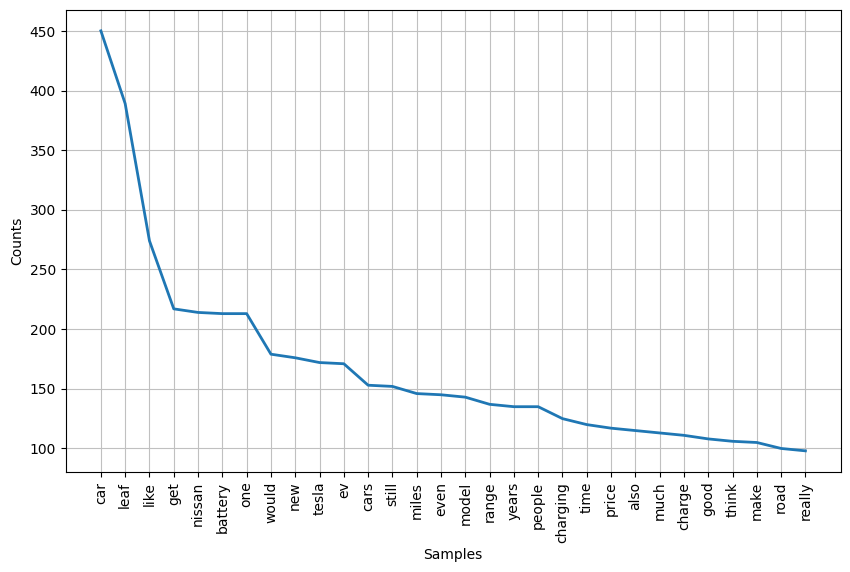

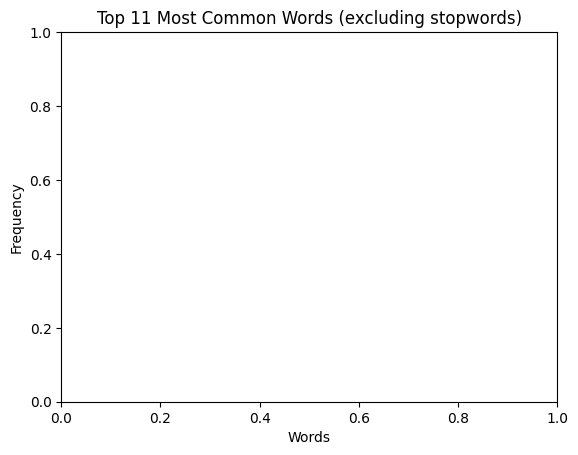

In [ ]:
import nltk
nltk.download('punkt')
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Define a function for tokenization and removing stopwords
def tokenize_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(str(text))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

# Apply tokenization to the cleaned text column in Nissan_Comments DataFrame
Nissan_Comments['tokenized_text'] = Nissan_Comments['body'].apply(tokenize_text)

# Analysis of popular words and phrases
def analyze_popular_words(tokenized_text):
    all_words = [word for sublist in tokenized_text for word in sublist]
    freq_dist = FreqDist(all_words)
    # Remove common stopwords from the list of top words
    stop_words = set(stopwords.words('english'))
    top_words = [(word, freq) for word, freq in freq_dist.most_common(10) if word.lower() not in stop_words]
    return top_words, freq_dist

# Perform analysis
top_words, freq_dist = analyze_popular_words(Nissan_Comments['tokenized_text'])

# Display top words and phrases
print("Top 10 Most Common Words and Phrases (excluding stopwords):")
for word, freq in top_words:
    print(f"{word}: {freq}")

# Plot the frequency distribution of top words
plt.figure(figsize=(10, 6))
freq_dist.plot(30, cumulative=False)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 11 Most Common Words (excluding stopwords)')
plt.show()


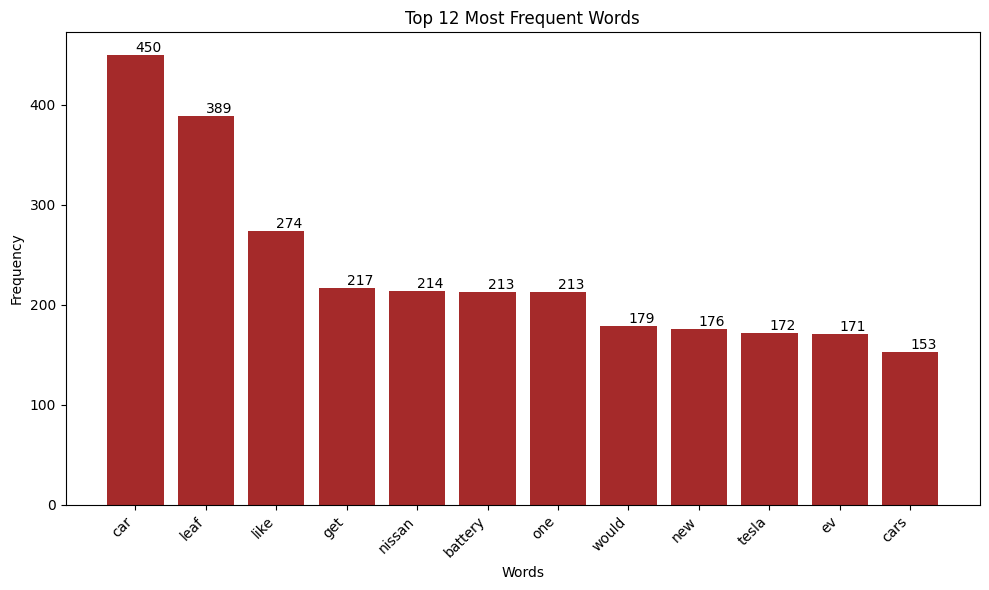

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
# using Nissan_comments DataFrame with a column named 'body'
# Initializing a Counter to count word frequencies
word_counter = Counter()
# Iterate over each row in the DataFrame, further tokenize the text, and update the Counter
for row in Nissan_Comments.to_dict("records"):
    body_text = row["body"]
    if isinstance(body_text, str):  # Checks if value is a string
        word_counter.update(body_text.split())
# Create a DataFrame from the most common words and their frequencies
df_tf = pd.DataFrame(word_counter.most_common(12), columns=["term", "frequency"])
# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(df_tf["term"], df_tf["frequency"], color='brown')

# assigns each bar with its corresponding frequency
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 12 Most Frequent Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
Nissan_Comments

,Unnamed: 0.1,Unnamed: 0,post_title,author,body,timestamp,n_words,chars
0,0,0,Nissan Actively Discourages Battery Replacemen...,stortag,know guy made business problem upgrades older ...,2020-10-30 11:17:54,46,268
1,1,1,Nissan Actively Discourages Battery Replacemen...,Car-face,nissan leaf sales canada peaked sales next clo...,2020-10-30 10:39:58,69,435
2,2,2,Nissan Actively Discourages Battery Replacemen...,Idiot_Savant_Tinker,looked leaf local nissan dealer wanted get tes...,2020-10-30 11:20:54,30,144
3,3,3,Nissan Actively Discourages Battery Replacemen...,wewewawa,love car explains honestly three years km repl...,2020-10-30 08:16:16,42,243
4,4,4,Nissan Actively Discourages Battery Replacemen...,generaljimdave,competent high voltage technician could refurb...,2020-10-30 11:59:43,125,676
...,...,...,...,...,...,...,...,...
1646,1646,143,Measure first people. Success in a Nissan Leaf,SquanchySnoo,,2022-09-13 22:00:18,1,1
1647,1647,144,Measure first people. Success in a Nissan Leaf,towell420,say know box stays keep upright gonna keep upr...,2022-09-14 00:31:55,18,88
1648,1648,145,Measure first people. Success in a Nissan Leaf,denlan,diagram side box arrow pointed upright though ...,2022-09-13 18:06:07,20,98
1649,1649,146,Measure first people. Success in a Nissan Leaf,Crazyblazy395,fair see,2022-09-13 21:24:24,5,23


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

# Load or define the Nissan_Comments DataFrame before using it
# Example: Nissan_Comments = pd.read_csv("your_dataset.csv")

# Preprocess text data
nltk.download('stopwords')
nltk.download('punkt')

# Remove stopwords
stop_words = set(stopwords.words('english'))
Nissan_Comments['body'] = Nissan_Comments['body'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

# Tokenize and stem the text
stemmer = PorterStemmer()
Nissan_Comments['body'] = Nissan_Comments['body'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

# Calculate word frequencies
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(Nissan_Comments['body'])
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Calculate correlation matrix
correlation_matrix = word_freq.corr()

# Analyze associations
target_word = 'life'
Highly_correlated_words = correlation_matrix[target_word].sort_values(ascending=False).head(10)
print("Words with high correlations 'positive':")
print(Highly_correlated_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Words with high correlations 'positive':
life           1.000000
indefinit      0.392139
block          0.323294
watch          0.291534
pz             0.275338
incorrectli    0.275338
ez             0.275338
smallest       0.275338
studi          0.273514
licens         0.266270
Name: life, dtype: float64


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

# Load or define the Nissan_Comments DataFrame before using it
# Example: Nissan_Comments = pd.read_csv("your_dataset.csv")

# Preprocess text data
nltk.download('stopwords')
nltk.download('punkt')

# Remove stopwords
stop_words = set(stopwords.words('english'))
Nissan_Comments['body'] = Nissan_Comments['body'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

# Tokenize and stem the text
stemmer = PorterStemmer()
Nissan_Comments['body'] = Nissan_Comments['body'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

# Calculate word frequencies
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(Nissan_Comments['body'])
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Calculate correlation matrix
correlation_matrix = word_freq.corr()

# Analyze associations
target_word = 'good'
Highly_correlated_words = correlation_matrix[target_word].sort_values(ascending=False).head(10)
print("Words with high correlations 'positive':")
print(Highly_correlated_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Words with high correlations 'positive':
good         1.000000
player       0.261663
lawn         0.261663
violat       0.261663
mow          0.261663
asphalt      0.261663
hypothesi    0.261663
provabl      0.261663
valley       0.261663
concret      0.261663
Name: good, dtype: float64


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

# Load or define the Nissan_Comments DataFrame before using it
Nissan_Comments = pd.read_csv("NissanLeaf_comments_merged.csv")

# Preprocess text data
nltk.download('stopwords')
nltk.download('punkt')

# Remove stopwords
stop_words = set(stopwords.words('english'))
Nissan_Comments['body'] = Nissan_Comments['body'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

# Tokenize and stem the text
stemmer = PorterStemmer()
Nissan_Comments['body'] = Nissan_Comments['body'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

# Calculate word frequencies
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(Nissan_Comments['body'])
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Convert word_freq values to strings
word_freq = word_freq.astype(str)

# Calculate correlation matrix
correlation_matrix = word_freq.corr()

# Analyze associations
target_word = 'bad'
Highly_correlated_words = correlation_matrix[target_word].sort_values(ascending=False).head(10)
print("Words with high correlations 'positive':")
print(Highly_correlated_words)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Words with high correlations 'positive':
bad          1.000000
overreact    0.277004
takeaway     0.277004
guest        0.277004
borderlin    0.277004
emphas       0.277004
remount      0.277004
gas          0.277004
frunk        0.277004
bless        0.277004
Name: bad, dtype: float64


In [ ]:
Nissan_Comments

,Unnamed: 0.1,Unnamed: 0,post_title,author,body,timestamp,n_words,chars
0,0,0,Nissan Actively Discourages Battery Replacemen...,stortag,know guy made busi problem upgrad older leaf l...,2020-10-30 11:17:54,46,268
1,1,1,Nissan Actively Discourages Battery Replacemen...,Car-face,nissan leaf sale canada peak sale next closest...,2020-10-30 10:39:58,69,435
2,2,2,Nissan Actively Discourages Battery Replacemen...,Idiot_Savant_Tinker,look leaf local nissan dealer want get tesla m...,2020-10-30 11:20:54,30,144
3,3,3,Nissan Actively Discourages Battery Replacemen...,wewewawa,love car explain honestli three year km replac...,2020-10-30 08:16:16,42,243
4,4,4,Nissan Actively Discourages Battery Replacemen...,generaljimdave,compet high voltag technician could refurbish ...,2020-10-30 11:59:43,125,676
...,...,...,...,...,...,...,...,...
1646,1646,143,Measure first people. Success in a Nissan Leaf,SquanchySnoo,,2022-09-13 22:00:18,1,1
1647,1647,144,Measure first people. Success in a Nissan Leaf,towell420,say know box stay keep upright gon na keep upr...,2022-09-14 00:31:55,18,88
1648,1648,145,Measure first people. Success in a Nissan Leaf,denlan,diagram side box arrow point upright though ma...,2022-09-13 18:06:07,20,98
1649,1649,146,Measure first people. Success in a Nissan Leaf,Crazyblazy395,fair see,2022-09-13 21:24:24,5,23


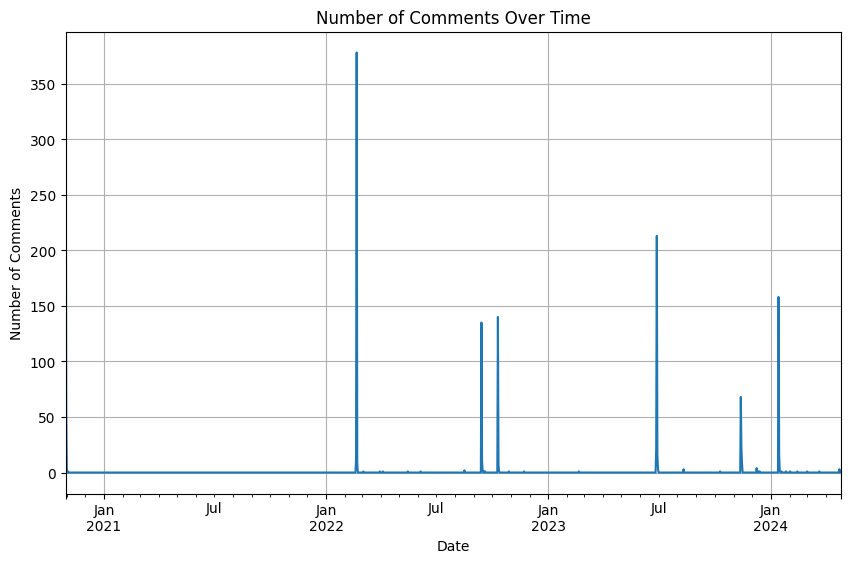

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# based on my dataframe Nissan_Comments

# convert the "timestamp" column to datetime format.
Nissan_Comments["timestamp"] = pd.to_datetime(Nissan_Comments["timestamp"])

# Set the "timestamp" column as the index
Nissan_Comments.set_index("timestamp", inplace=True)

# group the data by day and calculate the total number of comments per day.
comments_per_day = Nissan_Comments.resample("D").size()

# Plot the time series
plt.figure(figsize=(10, 6))
comments_per_day.plot()
plt.title("Number of Comments Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Comments")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each text snippet in the 'body' column
sentiment_scores = Nissan_Comments['body'].apply(lambda x: sia.polarity_scores(str(x)) if isinstance(x, str) else {'compound': 0.0})

# Create a DataFrame to store the sentiment scores
sentiment_df = pd.DataFrame(sentiment_scores.tolist())

# Reset the index of the original DataFrame 'cleaned_df'
Nissan_Comments.reset_index(drop=True, inplace=True)

# Concatenate the sentiment DataFrame with the original DataFrame 'cleaned_df'
Nissan_Comments_with_sentiment = pd.concat([Nissan_Comments, sentiment_df], axis=1)

# Add a new column to clearly state the sentiment of the text based on the compound score
Nissan_Comments_with_sentiment['sentiment'] = ''
Nissan_Comments_with_sentiment.loc[Nissan_Comments_with_sentiment['compound'] > 0, 'sentiment'] = 'Positive'
Nissan_Comments_with_sentiment.loc[Nissan_Comments_with_sentiment['compound'] == 0, 'sentiment'] = 'Neutral'
Nissan_Comments_with_sentiment.loc[Nissan_Comments_with_sentiment['compound'] < 0, 'sentiment'] = 'Negative'

# Display the DataFrame with the added sentiment column
print(Nissan_Comments_with_sentiment)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


      Unnamed: 0.1  Unnamed: 0  \
0                0           0   
1                1           1   
2                2           2   
3                3           3   
4                4           4   
...            ...         ...   
1646          1646         143   
1647          1647         144   
1648          1648         145   
1649          1649         146   
1650          1650         147   

                                             post_title               author  \
0     Nissan Actively Discourages Battery Replacemen...              stortag   
1     Nissan Actively Discourages Battery Replacemen...             Car-face   
2     Nissan Actively Discourages Battery Replacemen...  Idiot_Savant_Tinker   
3     Nissan Actively Discourages Battery Replacemen...             wewewawa   
4     Nissan Actively Discourages Battery Replacemen...       generaljimdave   
...                                                 ...                  ...   
1646     Measure first people. 

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Assuming 'cleaned_df' is your DataFrame and 'body' is the column containing text data
# Perform sentiment analysis on each text snippet in the column
sentiment_scores = Nissan_Comments['body'].apply(lambda x: sia.polarity_scores(str(x)) if isinstance(x, str) else {'compound': 0.0})

# Extract sentiment scores into separate columns
Nissan_Comments[['positive', 'negative', 'neutral', 'compound']] = pd.DataFrame(sentiment_scores.tolist())

# Add a new column to clearly state the sentiment of the text based on the compound score
Nissan_Comments['sentiment'] = ''
Nissan_Comments.loc[Nissan_Comments['compound'] > 0, 'sentiment'] = 'Positive'
Nissan_Comments.loc[Nissan_Comments['compound'] == 0, 'sentiment'] = 'Neutral'
Nissan_Comments.loc[Nissan_Comments['compound'] < 0, 'sentiment'] = 'Negative'

# Display the DataFrame with the added sentiment column
print(Nissan_Comments)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


      Unnamed: 0.1  Unnamed: 0  \
0                0           0   
1                1           1   
2                2           2   
3                3           3   
4                4           4   
...            ...         ...   
1646          1646         143   
1647          1647         144   
1648          1648         145   
1649          1649         146   
1650          1650         147   

                                             post_title               author  \
0     Nissan Actively Discourages Battery Replacemen...              stortag   
1     Nissan Actively Discourages Battery Replacemen...             Car-face   
2     Nissan Actively Discourages Battery Replacemen...  Idiot_Savant_Tinker   
3     Nissan Actively Discourages Battery Replacemen...             wewewawa   
4     Nissan Actively Discourages Battery Replacemen...       generaljimdave   
...                                                 ...                  ...   
1646     Measure first people. 

In [ ]:
# started by importing the necessary library
import pandas as pd
import nltk
# from natuarl language took kit import sentimentintensityanalyzer used to calculate the score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#This convert the text data to numerical data
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
#  downloads the VADER lexicon
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each text snippet in the column
sentiment_scores = Nissan_Comments['body'].apply(lambda x: sia.polarity_scores(x))

# Extract sentiment scores into separate columns
Nissan_Comments[['positive', 'negative', 'neutral', 'compound']] = pd.DataFrame(sentiment_scores.tolist())

# A new column to clearly state the sentiment of the text based on the compound score
Nissan_Comments['sentiment'] = ''
Nissan_Comments.loc[Nissan_Comments['compound'] > 0, 'sentiment'] = 'Positive'
Nissan_Comments.loc[Nissan_Comments['compound'] == 0, 'sentiment'] = 'Neutral'
Nissan_Comments.loc[Nissan_Comments['compound'] < 0, 'sentiment'] = 'Negative'

# we use "body" column of  cleaned nissan_comments text data for LDA
text_data = Nissan_Comments['body']
# Convert text data to  numerical document-term  matrix
vectorizer = CountVectorizer(max_features=1000, lowercase=True, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(text_data)

# Apply LatentDirichletAllocation
num_topics = 10 # Specify the number of topics
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(doc_term_matrix)

# Print the top words for each topic
feature_names = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda_model.components_):
    print("Topic %d:" % (idx))
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

# Assign topic probabilities to each document
topic_probabilities = lda_model.transform(doc_term_matrix)

# Add topic probabilities to DataFrame
for i in range(num_topics):
    Nissan_Comments['topic_{}'.format(i)] = topic_probabilities[:, i]

# Display the DataFrame with added topic probabilities
print(Nissan_Comments)
Nissan_Comments.to_csv('Nissan_Comments_with_topics.csv', index=False)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Topic 0:
car like want tv fit deal model drive set need
Topic 1:
car like make money sale time dealership think shit dealer
Topic 2:
credit tax bolt model mach chevi vehicl make tire look
Topic 3:
leaf batteri ev charg nissan rang car use cool like
Topic 4:
car leaf buy use good yeah model love know month
Topic 5:
car nissan chademo drive use year batteri make new got
Topic 6:
peopl replac vehicl tesla batteri buy new transport flat compani
Topic 7:
car leas tesla year want state leaf box buy incent
Topic 8:
car mile year cost price chang electr new like low
Topic 9:
charg trip road time leaf like tesla drive charger ev
      Unnamed: 0.1  Unnamed: 0  \
0                0           0   
1                1           1   
2                2           2   
3                3           3   
4                4           4   
...            ...         ...   
1646          1646         143   
1647          1647         144   
1648          1648         145   
1649          1649         146  

In [ ]:
Nissan_Comments

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Download the VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Assuming 'Tesla_Comments' is your DataFrame and 'body' is the column containing text data
# Perform sentiment analysis on each text snippet in the column
sentiment_scores = Nissan_Comments['body'].apply(lambda x: sia.polarity_scores(x))

# Extract sentiment scores into separate columns
Nissan_Comments[['positive', 'negative', 'neutral', 'compound']] = pd.DataFrame(sentiment_scores.tolist())

# Add a new column to clearly state the sentiment of the text based on the compound score
Nissan_Comments['sentiment'] = ''
Nissan_Comments.loc[Nissan_Comments['compound'] > 0, 'sentiment'] = 'Positive'
Nissan_Comments.loc[Nissan_Comments['compound'] == 0, 'sentiment'] = 'Neutral'
Nissan_Comments.loc[Nissan_Comments['compound'] < 0, 'sentiment'] = 'Negative'

# Preprocess text data for LDA
# Here, you can further preprocess the text data as needed (e.g., remove stopwords, perform lemmatization, etc.)
# For simplicity, we'll use the raw text data for LDA
text_data = Nissan_Comments['body']

# Convert text data to document-term matrix
vectorizer = CountVectorizer(max_features=1000, lowercase=True, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(text_data)

# Apply LDA
num_topics = 10 # Specify the number of topics
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(doc_term_matrix)

# Print the top words for each topic
feature_names = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda_model.components_):
    print("Topic %d:" % (idx))
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

# Assign topic probabilities to each document
topic_probabilities = lda_model.transform(doc_term_matrix)

# Add topic probabilities to DataFrame
for i in range(num_topics):
    Nissan_Comments['topic_{}'.format(i)] = topic_probabilities[:, i]

# Display the DataFrame with added topic probabilities
print(Nissan_Comments)
Nissan_Comments.to_csv('Nissan_Comments_with_topics.csv', index=False)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Topic 0:
mile year car like replac leaf batteri new chang nissan
Topic 1:
charg chademo charger leaf car fast like trip cc use
Topic 2:
batteri leaf ev cool http 100 nissan like com day
Topic 3:
car like care sure fit drive thing cheap make want
Topic 4:
tax leaf credit model leas price ev tesla year bolt
Topic 5:
car nissan tv leaf batteri buy issu model think use
Topic 6:
car new sell make tesla peopl like money ev model
Topic 7:
deal rang price model better cash pay dealership got car
Topic 8:
car drive want dealership dealer vehicl truck fuck buy nissan
Topic 9:
leaf trip road ev use tesla like ye thing peopl
      Unnamed: 0.1  Unnamed: 0  \
0                0           0   
1                1           1   
2                2           2   
3                3           3   
4                4           4   
...            ...         ...   
1646          1646         143   
1647          1647         144   
1648          1648         145   
1649          1649         146   
1650 

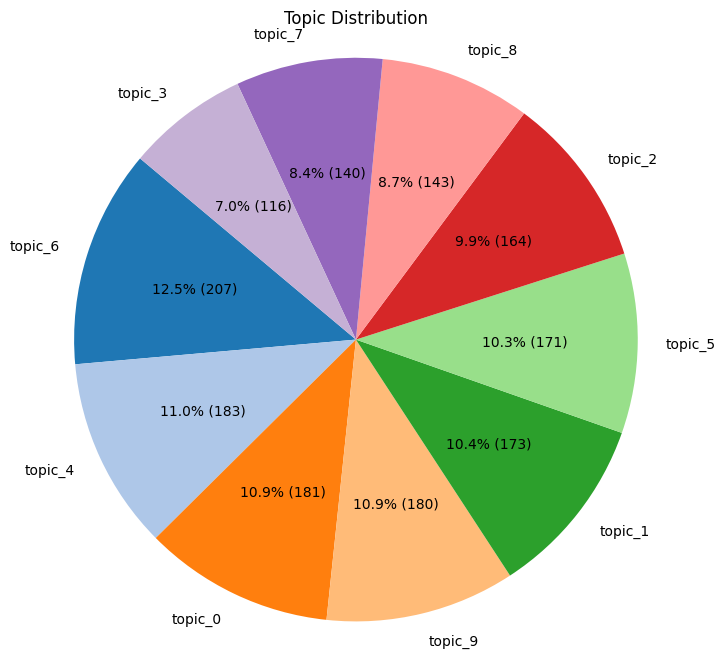

In [ ]:
# import math library
import math
topic_cols = [col for col in Nissan_Comments.columns if col.startswith('topic_')]

topic_distribution = Nissan_Comments[topic_cols].sum().sort_values(ascending=False)

# Plot a pie chart for topic distribution with number of comments underneath percentage

plt.figure(figsize=(8, 8))

wedges, texts, autotexts = plt.pie(topic_distribution, labels=topic_distribution.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors, textprops=dict(color="black"))

# Add number of comments rounded up underneath percentage

for i, (text, autotext) in enumerate(zip(texts, autotexts)):

    rounded_count = math.ceil(topic_distribution[i])

    autotext.set_text(f"{autotext.get_text()} ({rounded_count})")

plt.title('Topic Distribution')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

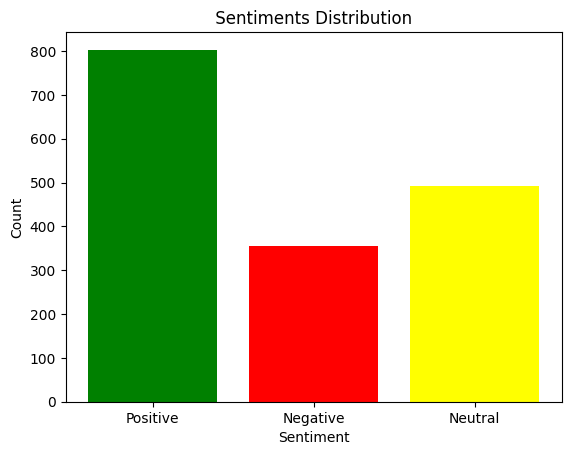

In [ ]:
import matplotlib.pyplot as plt

# Calculate the counts of positive, negative, and neutral sentiments
positive_count = (Nissan_Comments['sentiment'] == 'Positive').sum()
negative_count = (Nissan_Comments['sentiment'] == 'Negative').sum()
neutral_count = (Nissan_Comments['sentiment'] == 'Neutral').sum()

# Create labels and counts for each sentiment category
sentiments = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

# Create a bar plot
plt.bar(sentiments, counts, color=['green', 'red', 'yellow'])

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title(' Sentiments Distribution ')

# Show plot
plt.show()


Silhouette Score: -0.07061091589361992
Perplexity: 741.6473787821952


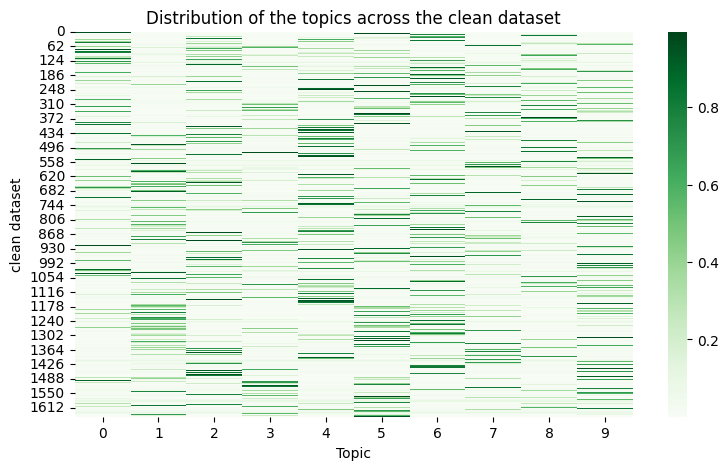

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

text_data = Nissan_Comments['body']

# Convert text data to document-term matrix
vectorizer = CountVectorizer(max_features=1000, lowercase=True, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(text_data)

# Apply LDA
num_topics = 10  # Specify the number of topics
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(doc_term_matrix)

# Assign topic probabilities to each document
topic_probabilities = lda_model.transform(doc_term_matrix)

# Evaluate goodness of fit using silhouette score
silhouette_avg = silhouette_score(doc_term_matrix, topic_probabilities.argmax(axis=1))
print("Silhouette Score:", silhouette_avg)
# Evaluate perplexity
perplexity = lda_model.perplexity(doc_term_matrix)
print("Perplexity:", perplexity)
# Visualize topic distribution using heatmap
plt.figure(figsize=(9, 5))
sns.heatmap(topic_probabilities, cmap='Greens')
plt.title('Distribution of the topics across the clean dataset')
plt.xlabel('Topic')
plt.ylabel('clean dataset')
plt.show()


In [ ]:
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

# Convert text data to a list of tokenized documents
tokenized_text_data = [doc.split() for doc in Nissan_Comments['body']]

# Create a dictionary mapping tokens to IDs
dictionary = Dictionary(tokenized_text_data)

# Create a document-term matrix
corpus = [dictionary.doc2bow(doc) for doc in tokenized_text_data]

# Train LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42)

# Compute coherence score
coherence_model = CoherenceModel(model=lda_model, texts=tokenized_text_data, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print("Coherence Score:", coherence_score)


Coherence Score: 0.6222130687149576
